# Project Planning

## Goal:

The goal is to find ways to improve the Zestimate so that it more accurately reflects the actual sale price. This will be done by determining which variables affect `logerror` and to what extent.|

## Deliverables:

1. A report that will summarize my findings in regards to how to improve the Zestimate.
2. A notebook that will show the work I did to reach my findings. It will be made available so that my work can be reproduced if desired.

## Data Dictionary:

- `logerror` - The log of the difference between the property's Zestimate and the actual sale price.
- `bathroomcnt` - The number of bathrooms (with halves) if the property is a home.
- `bedroomcnt` - The number of bedrooms (with halves) if the property is a home.
- `calculatedfinishedsquarefeet` - The calculated finished living area if the property is a home.
- `fullbathcnt` - Number of bathrooms that have a sink, shower, bathtub, and toilet.
- `garagecarcnt` - Total number of garages on lot.
- `roomcnt` - Total number of rooms.
- `yearbuilt` - Year that the first home was built.
- `taxvaluedollarcnt` - The total tax assessed.
- `taxamount` - The property tax assessed for that year.
- `regionidzip` - Zipcode of where the property is located.

## Brainstorming/Hypotheses:

##### What can be causing inaccurate estimates? 
- Any inaccuracies due to these variables can be due to how much value is being placed on a variable. Perhaps `yearbuilt` doesn't matter too much but it is given more weight in the estimate than it should have.
- Perhaps a variable isn't being accounted for, like the condition of the property. Vice versa, maybe a variable shouldn't be included in the valuation.

##### Do any of these variables stand out?

Initial impressions are that `taxamount` will be important in minimizing error since it is based on a valuation of the property itself. `garagecarcnt` is something that can vary in regards to importance to buyer. Due to this, it can lead to error when trying to accurately estimate what a property is worth.

##### Do any independent variables relate to each other?

`roomcnt` and `bedroomcnt` must relate to each other since they are both room counts (`bathroomcnt` can be included in that). `roomcnt` and `calculatedfinishedsquarefeet` can also have a correlation. `taxvaluedollarcnt` and `taxamount` may also be correlated.

##### Any additional features to consider?

I think having data on the following features and using them in the valuation of a property might help make the Zestimate more accurate:
- condition of property
- have a way to account for the amount of time the property has been on sale


# Data Acquisition

Imports

In [1]:
%matplotlib inline
# from env import user, password, host, get_connection, describe_tables
import numpy as np

# Acquisition
import pandas as pd

# Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# Exploring
import scipy.stats as stats

# Modeling
import statsmodels.api as sm

from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from sklearn.feature_selection import f_regression
# from env import path


Collecting data from `properties_2016.csv` and learning what it looks like.

In [2]:
all_zillow = pd.read_csv('properties_2016.csv')

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
all_zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 58 columns):
parcelid                        int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottub

In [4]:
properties = all_zillow[['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount'
#                          , 'regionidzip'
                        ]]
properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2985217 entries, 0 to 2985216
Data columns (total 10 columns):
parcelid                        int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedfinishedsquarefeet    float64
fullbathcnt                     float64
garagecarcnt                    float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
taxamount                       float64
dtypes: float64(9), int64(1)
memory usage: 227.8 MB


Looking at nulls.

In [5]:
properties.isna().sum()

parcelid                              0
bathroomcnt                       11462
bedroomcnt                        11450
calculatedfinishedsquarefeet      55565
fullbathcnt                      128912
garagecarcnt                    2101950
roomcnt                           11475
yearbuilt                         59928
taxvaluedollarcnt                 42550
taxamount                         31250
dtype: int64

Checking for duplicates in the `parcelid` column.

In [6]:
properties.parcelid.value_counts()

12584959    1
12755709    1
12751611    1
12753658    1
12747513    1
12749560    1
12776183    1
12778230    1
12772085    1
12774132    1
12767987    1
12770034    1
12763889    1
12729070    1
12722925    1
12724972    1
12718827    1
12720874    1
12714729    1
12743399    1
12745446    1
12757756    1
12761854    1
12741348    1
12759807    1
14016022    1
12820200    1
12427380    1
17066269    1
11446598    1
           ..
10861026    1
10854881    1
10856928    1
10768863    1
10770910    1
10764765    1
10766812    1
10824176    1
10828274    1
10826227    1
10834431    1
12253706    1
12247561    1
12227079    1
12222981    1
12225028    1
12237314    1
12231169    1
12233216    1
10836478    1
10815988    1
10830333    1
10832380    1
10842619    1
10844666    1
10838521    1
10840568    1
10820086    1
10813941    1
12582912    1
Name: parcelid, Length: 2985217, dtype: int64

Reading in the table that contains `logerror`.

In [7]:
error = pd.read_csv('train_2016_v2.csv')
error.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


Looks like there are duplicates in the `parcelid` column. 

In [8]:
error.parcelid.value_counts()

11842707    3
12613442    2
12032773    2
11729067    2
11845988    2
14753974    2
12779635    2
11188497    2
10883535    2
10790468    2
10798910    2
14678446    2
12689560    2
10796614    2
14316410    2
11633771    2
12023571    2
14667297    2
14294516    2
12715657    2
14444102    2
14022812    2
12978851    2
14057417    2
11135845    2
11477350    2
11146377    2
11866315    2
11602482    2
14500952    2
           ..
11240334    1
11320206    1
10739089    1
12123282    1
10741142    1
12031384    1
14130585    1
12027290    1
12862962    1
12756350    1
17197466    1
11046267    1
10910830    1
14202253    1
11038055    1
11104576    1
17265761    1
12858732    1
14604356    1
12068206    1
14210190    1
14736753    1
14599538    1
14601587    1
14613877    1
11199862    1
11726199    1
12096888    1
11181433    1
12438686    1
Name: parcelid, Length: 90150, dtype: int64

In [9]:
error.loc[error.parcelid == 11842707]

# error.parcelid.value_counts()

,parcelid,logerror,transactiondate
55794,11842707,-0.0284,2016-07-14
55795,11842707,0.0573,2016-08-22
55796,11842707,0.2078,2016-09-29


In [10]:
properties.loc[properties.parcelid == 11842707]

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount
1194750,11842707,2.0,3.0,1142.0,2.0,NaN,0.0,1922.0,614764.0,17087.75


The mean of the `logerror` is taken for duplicates so that each `parcelid` corresponds with only one `logerror` value. This lets us keep those instances in the dataframe while also not having multiple outcomes for the same set of independent variables.

In [11]:
mean_error = error[['parcelid', 'logerror', 'transactiondate']].groupby('parcelid', as_index=False).mean()
mean_error.loc[mean_error.parcelid == 11842707]

,parcelid,logerror
28922,11842707,0.0789


1503152    1048.0
2230954     608.0
685071      196.0
2960095    1528.0
2141809     162.0
2929493    1210.0
59818       616.0
2052745     771.0
223245      831.0
580511      760.0
Name: basementsqft, dtype: float64

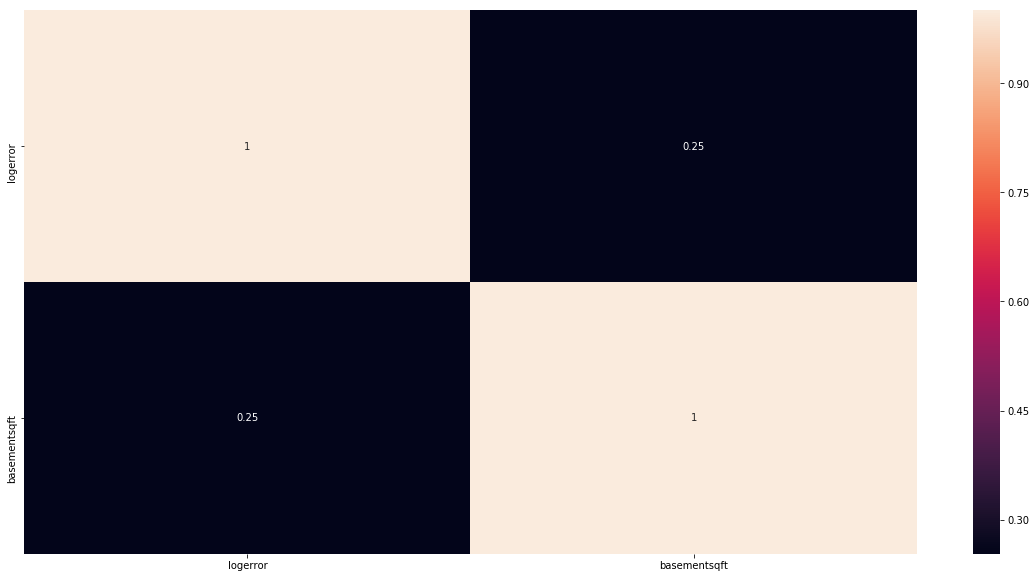

In [12]:
joined = properties.join(mean_error.set_index('parcelid'), on='parcelid', how='inner')
joined.loc[joined.parcelid == 11842707]

# the portion below was used to make a heatmap of all variables and their correlation with logerror.

test_joined = all_zillow.join(mean_error.set_index('parcelid'), on='parcelid', how='inner')
test_joined.head()
test_joined.drop(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fullbathcnt', 'garagecarcnt', 'regionidzip', 'yearbuilt', 'taxamount', 'taxvaluedollarcnt'], axis=1)
test_joined.isna().sum()

plt.figure(figsize=(20,10))
sns.heatmap(test_joined[['logerror', 'basementsqft']].corr(), annot=True)

test_joined.basementsqft.dropna().sample(10)

In [13]:
joined.count()

parcelid                        90150
bathroomcnt                     90150
bedroomcnt                      90150
calculatedfinishedsquarefeet    89492
fullbathcnt                     88974
garagecarcnt                    29897
roomcnt                         90150
yearbuilt                       89397
taxvaluedollarcnt               90149
taxamount                       90144
logerror                        90150
dtype: int64

In [14]:
joined.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet      658
fullbathcnt                      1176
garagecarcnt                    60253
roomcnt                             0
yearbuilt                         753
taxvaluedollarcnt                   1
taxamount                           6
logerror                            0
dtype: int64

In [15]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror
count,9.015000e+04,90150.000000,90150.000000,89492.000000,88974.000000,29897.000000,90150.000000,89397.000000,9.014900e+04,90144.000000,90150.000000
mean,1.298488e+07,2.279545,3.031936,1773.096869,2.241172,1.812055,1.478580,1968.539761,4.576379e+05,5983.070888,0.011472
std,2.505517e+06,1.004133,1.156114,928.136339,0.963106,0.608865,2.819802,23.763165,5.548532e+05,6838.506814,0.160949
min,1.071174e+07,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000
25%,1.155970e+07,2.000000,2.000000,1184.000000,2.000000,2.000000,0.000000,1953.000000,1.990560e+05,2873.260000,-0.025300
50%,1.254744e+07,2.000000,3.000000,1540.000000,2.000000,2.000000,0.000000,1970.000000,3.429310e+05,4543.100000,0.006000
75%,1.422757e+07,3.000000,4.000000,2095.000000,3.000000,2.000000,0.000000,1987.000000,5.405890e+05,6900.165000,0.039200
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,24.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000


In [16]:
joined.loc[(joined.roomcnt == 0) & ((joined.bedroomcnt > 0) | (joined.bathroomcnt > 0)), 'roomcnt'] = 100

def room_fix(i):
    if i == 100:
        return 1
    else:
        return 0

joined['nonsense_room'] = joined.roomcnt.apply(room_fix)

joined.loc[(joined.roomcnt == 100) & ((joined.bedroomcnt > 0) | (joined.bathroomcnt > 0)), 'roomcnt'] = 0


Notice that `roomcnt` has a lot of 0's

Handling properties with null values for `calculatedfinishedsquarefeet`. If `roomcnt`, `bedroomcnt`, and `bathroomcnt` are `0` then it is most likely just a lot and not a house.

Decision needs to be made to keep `roomcnt` or drop the column. Looking at some random rows, `roomcnt` in general is the sum of `bedroomcnt` and `bathroomcnt`. This means that we'll still be capturing some of that information through those variables. We will drop `roomcnt`.

In [17]:
# joined.drop('roomcnt', axis=1, inplace=True)
# joined.sample(10)

In [18]:
joined.loc[(joined.calculatedfinishedsquarefeet.isnull()) 
            & (joined.bathroomcnt == float(0))
            & (joined.bedroomcnt == float(0)), 'calculatedfinishedsquarefeet'] = 0




In [19]:
joined.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet        9
fullbathcnt                      1176
garagecarcnt                    60253
roomcnt                             0
yearbuilt                         753
taxvaluedollarcnt                   1
taxamount                           6
logerror                            0
nonsense_room                       0
dtype: int64

In [20]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room
count,9.015000e+04,90150.000000,90150.000000,90141.000000,88974.000000,29897.000000,90150.000000,89397.000000,9.014900e+04,90144.000000,90150.000000,90150.000000
mean,1.298488e+07,2.279545,3.031936,1760.330871,2.241172,1.812055,1.478580,1968.539761,4.576379e+05,5983.070888,0.011472,0.759590
std,2.505517e+06,1.004133,1.156114,936.860408,0.963106,0.608865,2.819802,23.763165,5.548532e+05,6838.506814,0.160949,0.427335
min,1.071174e+07,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000
25%,1.155970e+07,2.000000,2.000000,1176.000000,2.000000,2.000000,0.000000,1953.000000,1.990560e+05,2873.260000,-0.025300,1.000000
50%,1.254744e+07,2.000000,3.000000,1535.000000,2.000000,2.000000,0.000000,1970.000000,3.429310e+05,4543.100000,0.006000,1.000000
75%,1.422757e+07,3.000000,4.000000,2089.000000,3.000000,2.000000,0.000000,1987.000000,5.405890e+05,6900.165000,0.039200,1.000000
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,24.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000,1.000000


In [21]:
joined.loc[(joined.garagecarcnt.isnull()) 
            & (joined.bathroomcnt == float(0))
            & (joined.bedroomcnt == float(0)), 'garagecarcnt'] = 0


In [22]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,garagecarcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room
count,9.015000e+04,90150.000000,90150.000000,90141.000000,88974.000000,30831.000000,90150.000000,89397.000000,9.014900e+04,90144.000000,90150.000000,90150.000000
mean,1.298488e+07,2.279545,3.031936,1760.330871,2.241172,1.757160,1.478580,1968.539761,4.576379e+05,5983.070888,0.011472,0.759590
std,2.505517e+06,1.004133,1.156114,936.860408,0.963106,0.675239,2.819802,23.763165,5.548532e+05,6838.506814,0.160949,0.427335
min,1.071174e+07,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000
25%,1.155970e+07,2.000000,2.000000,1176.000000,2.000000,1.000000,0.000000,1953.000000,1.990560e+05,2873.260000,-0.025300,1.000000
50%,1.254744e+07,2.000000,3.000000,1535.000000,2.000000,2.000000,0.000000,1970.000000,3.429310e+05,4543.100000,0.006000,1.000000
75%,1.422757e+07,3.000000,4.000000,2089.000000,3.000000,2.000000,0.000000,1987.000000,5.405890e+05,6900.165000,0.039200,1.000000
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,24.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000,1.000000


In [23]:
joined.isna().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
calculatedfinishedsquarefeet        9
fullbathcnt                      1176
garagecarcnt                    59319
roomcnt                             0
yearbuilt                         753
taxvaluedollarcnt                   1
taxamount                           6
logerror                            0
nonsense_room                       0
dtype: int64

Tried to fill in `garagecarcnt` but still 59000+ empty values. Dropping `garagecarcnt`.

In [24]:
joined.drop('garagecarcnt', axis=1, inplace=True)
joined.sample(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room
1859768,17139541,2.0,2.0,1123.0,2.0,4.0,1980.0,166222.0,1824.96,0.1249,0
151600,11175633,3.0,3.0,2308.0,3.0,0.0,1988.0,422436.0,5942.67,0.0139,1
62802,11280850,2.0,4.0,1958.0,2.0,0.0,1971.0,142950.0,2447.35,0.0000,1
2490761,12461234,2.0,3.0,1385.0,2.0,0.0,1942.0,282364.0,3497.29,0.0020,1
1932699,11302037,3.0,4.0,2843.0,3.0,0.0,2005.0,171839.0,3817.58,-0.0780,1
1112048,14144267,5.0,5.0,6271.0,4.0,7.0,2007.0,1413819.0,31508.52,3.2890,0
479226,11297725,2.0,3.0,1531.0,2.0,0.0,1982.0,107143.0,2083.68,-0.2421,1
823295,11884616,3.0,3.0,1197.0,3.0,0.0,1985.0,305205.0,3818.23,0.0834,1
1974694,14143574,2.5,3.0,2469.0,2.0,0.0,1989.0,453898.0,5262.36,0.0344,1
1876747,11091379,3.0,3.0,2001.0,3.0,0.0,1963.0,107461.0,6086.93,-0.0545,1


In [25]:
joined.count()

parcelid                        90150
bathroomcnt                     90150
bedroomcnt                      90150
calculatedfinishedsquarefeet    90141
fullbathcnt                     88974
roomcnt                         90150
yearbuilt                       89397
taxvaluedollarcnt               90149
taxamount                       90144
logerror                        90150
nonsense_room                   90150
dtype: int64

In [26]:
joined.isna().sum()

parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedfinishedsquarefeet       9
fullbathcnt                     1176
roomcnt                            0
yearbuilt                        753
taxvaluedollarcnt                  1
taxamount                          6
logerror                           0
nonsense_room                      0
dtype: int64

Going to fill in null values in `fullbathcnt` if `bathroomcnt` and `bedroomcnt` are 0.

In [27]:
joined.loc[joined.fullbathcnt.isna()].sample(10)

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room
2747511,14239442,0.0,0.0,2180.0,NaN,0.0,1961.0,595000.0,6724.62,0.1840,0
129294,13868895,0.0,0.0,1482.0,NaN,0.0,1955.0,520189.0,6203.12,-0.0408,0
93898,11727144,0.0,0.0,4792.0,NaN,0.0,NaN,247739.0,3423.11,0.0478,0
2494245,14034494,0.0,0.0,1658.0,NaN,0.0,1962.0,489590.0,5936.16,0.0898,0
1947897,12311185,0.0,0.0,1966.0,NaN,0.0,1959.0,188054.0,2731.78,-0.2070,0
119427,17129421,0.0,0.0,1680.0,NaN,0.0,1979.0,39647.0,405.94,0.0305,0
1546769,13991825,0.0,0.0,1000.0,NaN,6.0,1954.0,142797.0,5098.58,-0.3827,0
4607,11683467,0.0,0.0,2290.0,NaN,0.0,1981.0,203396.0,3976.53,0.2119,0
89082,13863925,0.0,0.0,0.0,NaN,0.0,NaN,586929.0,11131.16,-0.3188,0
2081906,10829111,0.0,0.0,0.0,NaN,0.0,NaN,145857.0,1785.14,-0.1887,0


In [28]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room
count,9.015000e+04,90150.000000,90150.000000,90141.000000,88974.000000,90150.000000,89397.000000,9.014900e+04,90144.000000,90150.000000,90150.000000
mean,1.298488e+07,2.279545,3.031936,1760.330871,2.241172,1.478580,1968.539761,4.576379e+05,5983.070888,0.011472,0.759590
std,2.505517e+06,1.004133,1.156114,936.860408,0.963106,2.819802,23.763165,5.548532e+05,6838.506814,0.160949,0.427335
min,1.071174e+07,0.000000,0.000000,0.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000
25%,1.155970e+07,2.000000,2.000000,1176.000000,2.000000,0.000000,1953.000000,1.990560e+05,2873.260000,-0.025300,1.000000
50%,1.254744e+07,2.000000,3.000000,1535.000000,2.000000,0.000000,1970.000000,3.429310e+05,4543.100000,0.006000,1.000000
75%,1.422757e+07,3.000000,4.000000,2089.000000,3.000000,0.000000,1987.000000,5.405890e+05,6900.165000,0.039200,1.000000
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000,1.000000


In [29]:
joined.loc[(joined.bathroomcnt == float(0)) & (joined.bedroomcnt == float(0)) & (joined.fullbathcnt.isna()), 'fullbathcnt'] = 0
joined.isna().sum()

parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet      9
fullbathcnt                      39
roomcnt                           0
yearbuilt                       753
taxvaluedollarcnt                 1
taxamount                         6
logerror                          0
nonsense_room                     0
dtype: int64

In [30]:
joined.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room
count,9.015000e+04,90150.000000,90150.000000,90141.000000,90111.000000,90150.000000,89397.000000,9.014900e+04,90144.000000,90150.000000,90150.000000
mean,1.298488e+07,2.279545,3.031936,1760.330871,2.212893,1.478580,1968.539761,4.576379e+05,5983.070888,0.011472,0.759590
std,2.505517e+06,1.004133,1.156114,936.860408,0.989165,2.819802,23.763165,5.548532e+05,6838.506814,0.160949,0.427335
min,1.071174e+07,0.000000,0.000000,0.000000,0.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000
25%,1.155970e+07,2.000000,2.000000,1176.000000,2.000000,0.000000,1953.000000,1.990560e+05,2873.260000,-0.025300,1.000000
50%,1.254744e+07,2.000000,3.000000,1535.000000,2.000000,0.000000,1970.000000,3.429310e+05,4543.100000,0.006000,1.000000
75%,1.422757e+07,3.000000,4.000000,2089.000000,3.000000,0.000000,1987.000000,5.405890e+05,6900.165000,0.039200,1.000000
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000,1.000000


Removing the remaining rows that have null values.

In [31]:
joined_nonull = joined.dropna(subset=['yearbuilt', 'taxvaluedollarcnt', 'taxamount',
#                                       'regionidzip',
                                      'calculatedfinishedsquarefeet', 'fullbathcnt'])
joined_nonull.count()

parcelid                        89349
bathroomcnt                     89349
bedroomcnt                      89349
calculatedfinishedsquarefeet    89349
fullbathcnt                     89349
roomcnt                         89349
yearbuilt                       89349
taxvaluedollarcnt               89349
taxamount                       89349
logerror                        89349
nonsense_room                   89349
dtype: int64

In [32]:
joined_nonull['better_room'] = joined_nonull.bathroomcnt + joined_nonull.bedroomcnt
joined_nonull['abs_logerror'] = joined_nonull.logerror.apply(abs)
joined_nonull['sqft_per_room'] = joined_nonull.calculatedfinishedsquarefeet/joined_nonull.better_room

joined_nonull.dropna(subset=['sqft_per_room'], inplace=True)
joined_nonull.loc[joined_nonull.sqft_per_room == np.inf]

joined_nonull = joined_nonull[joined_nonull.sqft_per_room != np.inf]

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [33]:
joined_nonull.isna().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fullbathcnt                     0
roomcnt                         0
yearbuilt                       0
taxvaluedollarcnt               0
taxamount                       0
logerror                        0
nonsense_room                   0
better_room                     0
abs_logerror                    0
sqft_per_room                   0
dtype: int64

Making a df that has outliers for `logerror`. This means that the data had a Zestimate that  was significantly off from the sales price.

In [34]:
print(joined_nonull.logerror.describe())
logerror_iqr = 0.0383 - (-0.0253)
logerror_distance_to_outlier = logerror_iqr * 1.5
print(logerror_distance_to_outlier)

count    88879.000000
mean         0.011478
std          0.158224
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.038300
max          4.737000
Name: logerror, dtype: float64
0.09540000000000001


In [35]:
logerror_outliers = joined_nonull.loc[(joined_nonull.logerror > (0.0383 + 0.0954)) | (joined_nonull.logerror < (-0.0253 - 0.0954))]
logerror_outliers.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,better_room,abs_logerror,sqft_per_room
count,1.039200e+04,10392.000000,10392.000000,10392.000000,10392.000000,10392.000000,10392.000000,1.039200e+04,10392.000000,10392.000000,10392.000000,10392.000000,10392.000000,10392.000000
mean,1.263234e+07,2.327512,3.150982,1881.803310,2.284738,1.176482,1959.055331,5.081363e+05,6844.721307,0.056941,0.811875,5.478493,0.307295,336.970085
std,1.602778e+06,1.204084,1.318206,1183.198004,1.186994,2.553448,25.287596,8.699136e+05,10897.145382,0.442379,0.390831,2.298431,0.323267,105.225664
min,1.071191e+07,1.000000,0.000000,214.000000,1.000000,0.000000,1890.000000,7.837000e+03,96.740000,-4.605000,0.000000,1.000000,0.121000,87.157895
25%,1.155461e+07,2.000000,2.000000,1152.000000,2.000000,0.000000,1942.000000,1.521290e+05,2497.155000,-0.177900,1.000000,4.000000,0.157800,267.000000
50%,1.216198e+07,2.000000,3.000000,1544.500000,2.000000,0.000000,1957.000000,2.984790e+05,4264.315000,0.144100,1.000000,5.000000,0.208600,313.200000
75%,1.307769e+07,3.000000,4.000000,2241.000000,3.000000,0.000000,1978.000000,5.516625e+05,7348.152500,0.240000,1.000000,6.500000,0.320200,383.000000
max,1.730080e+07,15.000000,16.000000,20013.000000,15.000000,14.000000,2015.000000,2.775000e+07,321936.090000,4.737000,1.000000,26.000000,4.737000,1792.000000


Making a list of the columns in the DataFrame.

In [36]:
colnames = joined_nonull.columns
colnames

Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount',
       'logerror', 'nonsense_room', 'better_room', 'abs_logerror',
       'sqft_per_room'],
      dtype='object')

Making a list of the independent variables.

In [37]:
attributes = colnames[1:].drop('logerror')
attributes

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt', 'taxamount',
       'nonsense_room', 'better_room', 'abs_logerror', 'sqft_per_room'],
      dtype='object')

Our independent variable is `logerror`. It is continuous.

Boxplots and histograms of all the variables to get a better idea of their distributions.

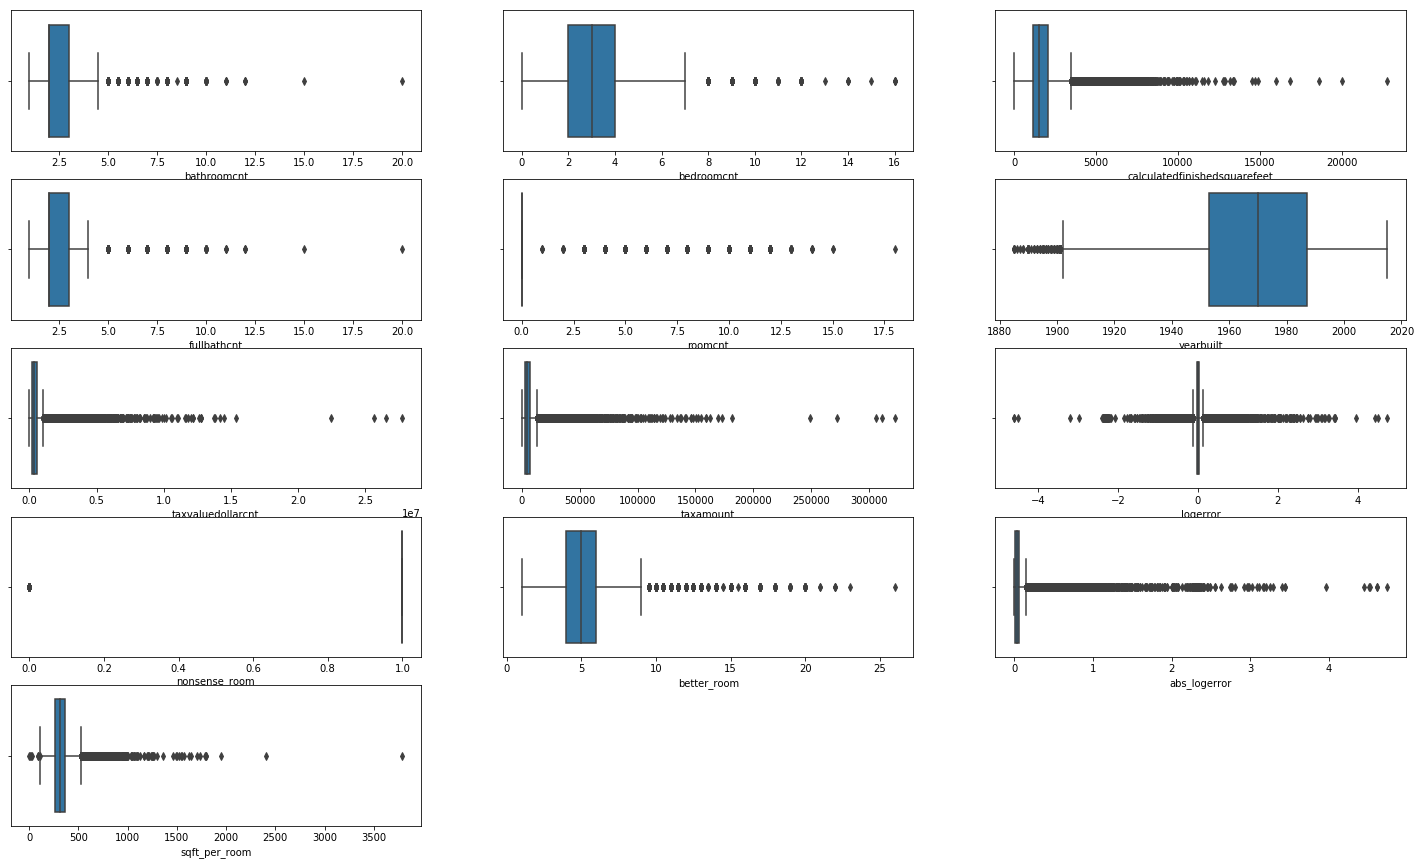

In [38]:
plt.figure(figsize=(25,15))

for i, column in enumerate(joined_nonull.drop('parcelid', axis=1)):
    plt.subplot(5, 3, (i+1))
    sns.boxplot(joined_nonull[column])
    
plt.show()

In [39]:
# plt.figure(figsize=(25,15))

# for i, column in enumerate(joined_nonull.drop('parcelid', axis=1)):
#     plt.subplot(4, 3, (i+1))
#     sns.distplot(joined_nonull[column])
    
# plt.show()

Attempting to apply min-max normalization to the DataFrame.

In [40]:
# joined_nonull.sample()
# # joined_nonull['age'] = 2019 - joined_nonull.yearbuilt
# # joined_nonull['abs_logerror'] = joined_nonull.logerror.apply(abs)
# # joined_nonull.drop(['yearbuilt'], axis=1, inplace=True)
# # joined_nonull.drop(['logerror'], axis=1, inplace=True)
# joined_nonull.drop(['parcelid', 'fullbathcnt'], axis=1, inplace=True)

# joined_nonull.sample()

In [41]:
normalized_zillow = (joined_nonull-joined_nonull.min())/(joined_nonull.max()-joined_nonull.min())
normalized_zillow.sample(10)

# That normalized all columns. Need to undo that for parcelid, yearbuilt, regionidzip

# normalized_zillow['parcelid'] = normalized_zillow.parcelid * (joined_nonull.parcelid.max()-joined_nonull.parcelid.min()) + joined_nonull.parcelid.min()
# normalized_zillow['yearbuilt'] = normalized_zillow.yearbuilt * (joined.yearbuilt.max()-joined.yearbuilt.min()) + joined.yearbuilt.min()
# normalized_zillow['regionidzip'] = normalized_zillow.regionidzip * (joined.regionidzip.max()-joined.regionidzip.min()) + joined.regionidzip.min()

normalized_zillow.sample(10)




,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,better_room,abs_logerror,sqft_per_room
280874,0.026240,0.078947,0.1250,0.075597,0.052632,0.000000,0.807692,0.027170,0.027456,0.503329,1.0,0.14,0.020498,0.100746
1521417,0.006054,0.000000,0.1875,0.040063,0.000000,0.000000,0.292308,0.034917,0.037553,0.500182,1.0,0.12,0.014292,0.060056
1448174,0.007999,0.052632,0.2500,0.077664,0.052632,0.000000,0.600000,0.010722,0.011370,0.494423,1.0,0.20,0.002934,0.077583
1480671,0.012800,0.052632,0.2500,0.078016,0.052632,0.000000,0.600000,0.004500,0.006465,0.545761,1.0,0.20,0.104180,0.077935
312412,0.041815,0.052632,0.1250,0.055323,0.052632,0.277778,0.638462,0.002636,0.002712,0.490227,0.0,0.12,0.005341,0.082948
963358,0.022561,0.052632,0.1875,0.085756,0.052632,0.388889,0.615385,0.003114,0.003876,0.490559,0.0,0.16,0.004687,0.102846
2101046,0.005523,0.157895,0.3125,0.143454,0.157895,0.000000,0.523077,0.028226,0.029916,0.504110,1.0,0.32,0.022039,0.095527
96268,0.010690,0.000000,0.1875,0.064515,0.000000,0.000000,0.038462,0.010659,0.011687,0.494841,1.0,0.12,0.003758,0.096737
891134,0.002689,0.105263,0.1875,0.081006,0.105263,0.000000,0.892308,0.015999,0.018788,0.493684,1.0,0.20,0.001478,0.080925
2134917,0.012468,0.105263,0.1875,0.074673,0.105263,0.000000,0.607692,0.003260,0.003713,0.488793,1.0,0.20,0.008170,0.074592


In [42]:
normalized_zillow.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,better_room,abs_logerror,sqft_per_room
count,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000
mean,0.014842,0.068888,0.191843,0.077677,0.065308,0.083052,0.643005,0.016489,0.018401,0.494164,0.769552,0.175135,0.014216,0.085592
std,0.016474,0.051344,0.069330,0.040626,0.050656,0.157258,0.182816,0.019945,0.021140,0.016937,0.421122,0.075035,0.030322,0.023714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005537,0.052632,0.125000,0.051893,0.052632,0.000000,0.523077,0.007222,0.008801,0.490227,1.000000,0.120000,0.002934,0.069534
50%,0.012023,0.052632,0.187500,0.067505,0.052632,0.000000,0.653846,0.012384,0.013968,0.493577,1.000000,0.160000,0.006861,0.081005
75%,0.023036,0.105263,0.250000,0.091737,0.105263,0.000000,0.784615,0.019480,0.021262,0.497035,1.000000,0.200000,0.014482,0.096647
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
joined_nonull.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,better_room,abs_logerror,sqft_per_room
count,8.887900e+04,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,8.887900e+04,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000
mean,1.297142e+07,2.308875,3.069488,1768.297686,2.240844,1.494943,1968.590713,4.576035e+05,5972.244672,0.011478,0.769552,5.378363,0.067343,325.017512
std,2.508203e+06,0.975543,1.109281,923.786902,0.962473,2.830641,23.766103,5.534683e+05,6804.606567,0.158224,0.421122,1.875884,0.143637,89.862891
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000,1.000000,0.000000,0.666667
25%,1.155474e+07,2.000000,2.000000,1182.000000,2.000000,0.000000,1953.000000,2.004310e+05,2882.055000,-0.025300,1.000000,4.000000,0.013900,264.166667
50%,1.254222e+07,2.000000,3.000000,1537.000000,2.000000,0.000000,1970.000000,3.436840e+05,4545.140000,0.006000,1.000000,5.000000,0.032500,307.636364
75%,1.421891e+07,3.000000,4.000000,2088.000000,3.000000,0.000000,1987.000000,5.405890e+05,6892.925000,0.038300,1.000000,6.000000,0.068600,366.909091
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000,1.000000,26.000000,4.737000,3790.166667


Considering looking at perfect Zestimates and see if they have anything in common. Not many perfect estimates though.

In [44]:
perfect_est = joined_nonull.loc[joined_nonull.logerror == 0]
perfect_est.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,better_room,abs_logerror,sqft_per_room
count,8.320000e+02,832.000000,832.000000,832.000000,832.000000,832.000000,832.000000,8.320000e+02,832.000000,832.0,832.000000,832.000000,832.0,832.000000
mean,1.318665e+07,2.295673,3.061298,1728.272837,2.207933,1.621394,1972.362981,4.409740e+05,5731.732392,0.0,0.747596,5.356971,0.0,320.099796
std,1.794014e+06,0.863252,1.064623,817.881309,0.857492,2.888572,22.765967,4.168920e+05,5275.805881,0.0,0.434653,1.722289,0.0,84.769633
min,1.072143e+07,1.000000,0.000000,456.000000,1.000000,0.000000,1885.000000,1.776100e+04,349.560000,0.0,0.000000,1.000000,0.0,170.400000
25%,1.162046e+07,2.000000,2.000000,1194.000000,2.000000,0.000000,1956.000000,2.271395e+05,3130.040000,0.0,0.000000,4.000000,0.0,261.625000
50%,1.283806e+07,2.000000,3.000000,1499.500000,2.000000,0.000000,1974.000000,3.693080e+05,4675.385000,0.0,1.000000,5.000000,0.0,306.333333
75%,1.444281e+07,3.000000,4.000000,2041.750000,3.000000,3.000000,1989.000000,5.280975e+05,6745.570000,0.0,1.000000,6.000000,0.0,356.925000
max,1.730007e+07,6.000000,12.000000,7926.000000,6.000000,10.000000,2014.000000,5.500000e+06,65090.820000,0.0,1.000000,16.000000,0.0,980.000000


In [45]:
joined_nonull.loc[joined_nonull.taxamount <= 65090].describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,better_room,abs_logerror,sqft_per_room
count,8.874000e+04,88740.000000,88740.000000,88740.000000,88740.000000,88740.000000,88740.000000,8.874000e+04,88740.000000,88740.000000,88740.000000,88740.000000,88740.000000,88740.000000
mean,1.297244e+07,2.302789,3.066464,1760.360041,2.234922,1.496000,1968.577992,4.461136e+05,5823.817933,0.011440,0.769337,5.369253,0.067172,324.592480
std,2.509621e+06,0.960517,1.105925,893.235119,0.948009,2.830601,23.753904,4.416891e+05,5380.919802,0.157716,0.421259,1.858775,0.143155,89.023153
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000,1.000000,0.000000,0.666667
25%,1.155382e+07,2.000000,2.000000,1181.000000,2.000000,0.000000,1953.000000,2.000838e+05,2878.810000,-0.025300,1.000000,4.000000,0.013900,264.000000
50%,1.254318e+07,2.000000,3.000000,1536.000000,2.000000,0.000000,1970.000000,3.432420e+05,4540.155000,0.006000,1.000000,5.000000,0.032500,307.500000
75%,1.421954e+07,3.000000,4.000000,2085.000000,3.000000,0.000000,1987.000000,5.390000e+05,6878.490000,0.038300,1.000000,6.000000,0.068300,366.600000
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,15.000000,2015.000000,7.000000e+06,64701.010000,4.737000,1.000000,26.000000,4.737000,3790.166667


In [46]:
joined_nonull.sample()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,better_room,abs_logerror,sqft_per_room
2234916,11587694,2.0,1.0,794.0,2.0,0.0,1973.0,318506.0,3850.18,-0.2497,1,3.0,0.2497,264.666667


# Data Exploration

Splitting the data into separate train and test sets.

In [47]:
X = normalized_zillow.drop(['logerror', 'abs_logerror'], axis=1)
y = normalized_zillow[['logerror']]

# X = joined_nonull.drop(['parcelid', 'logerror'], axis=1)
# y = joined_nonull[['logerror']]

# X2 = logerror_outliers.drop(['parcelid', 'logerror'], axis=1)
# y2 = logerror_outliers[['logerror']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.60)

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size=.60)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [49]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# print(X_train2.shape)
# print(y_train2.shape)
# print(X_test2.shape)
# print(y_test2.shape)

(53327, 12)
(53327, 1)
(35552, 12)
(35552, 1)


In [50]:
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

print(train.shape)
print(test.shape)

# train2 = pd.concat([X_train2, y_train2], axis=1)
# test2 = pd.concat([X_test2, y_test2], axis=1)

# print(train2.shape)
# print(test2.shape)

(53327, 13)
(35552, 13)


What is the relationship between the different variables like?

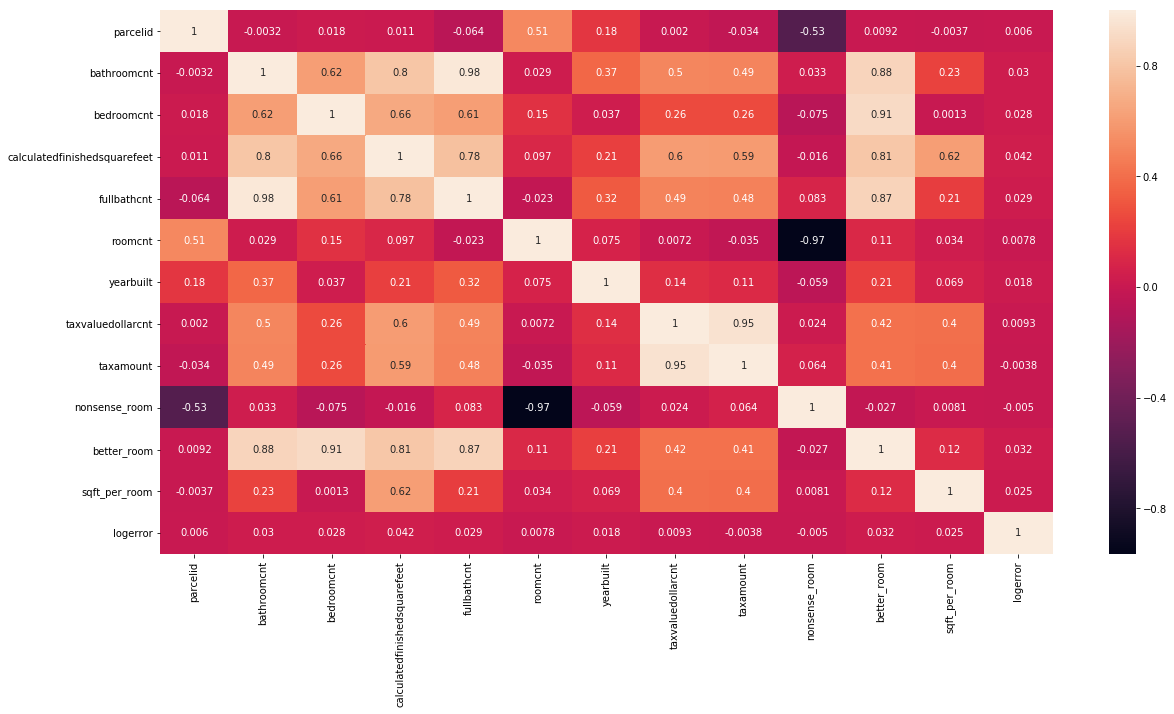

In [51]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(), annot=True)

# plt.figure(figsize=(20,10))
# sns.heatmap(train2.corr(), annot=True)


Create jointplots for all independent variables and `logerror`.

/usr/local/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
/usr/local/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWa

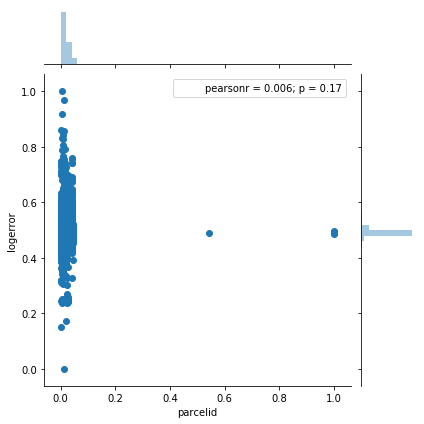

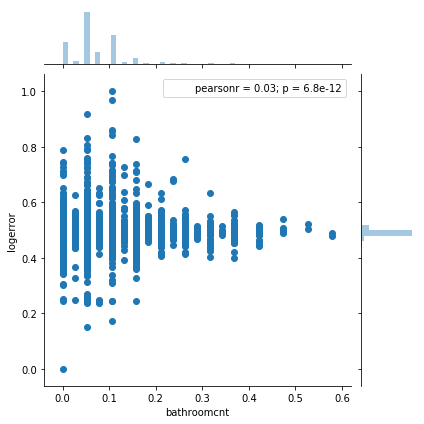

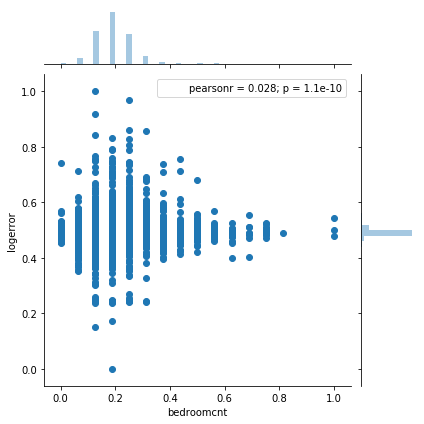

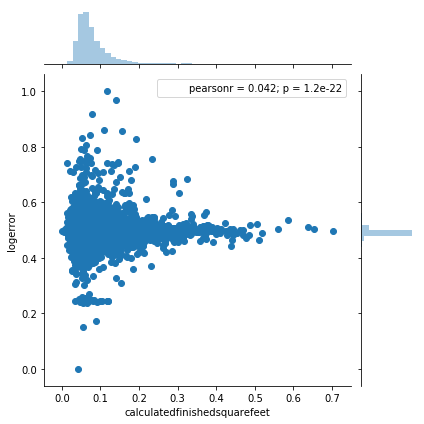

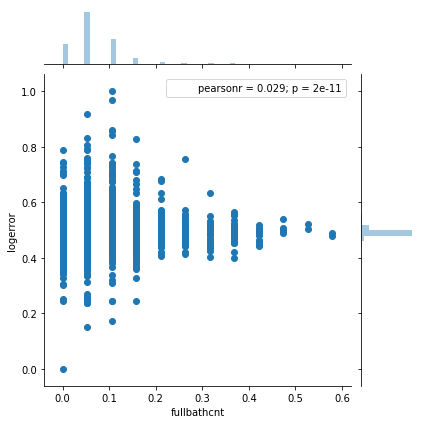

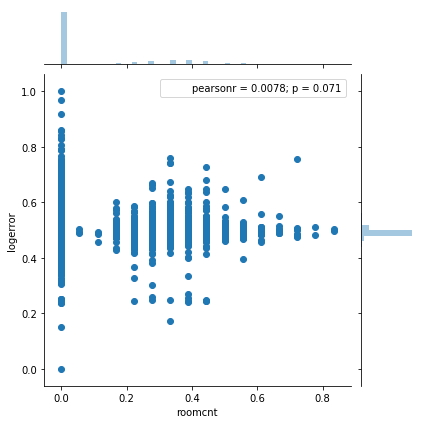

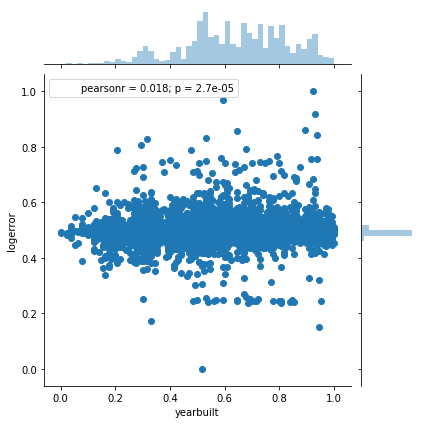

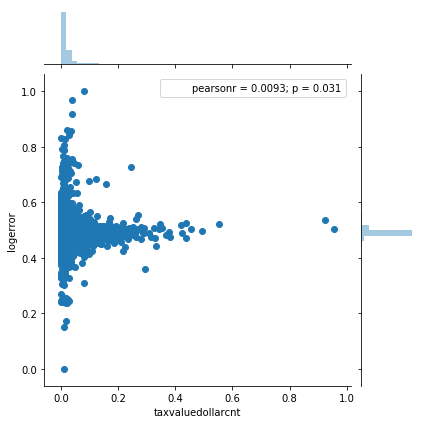

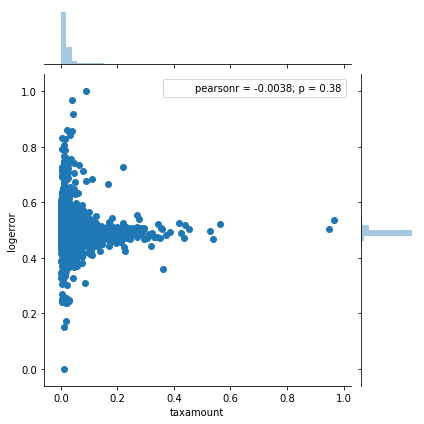

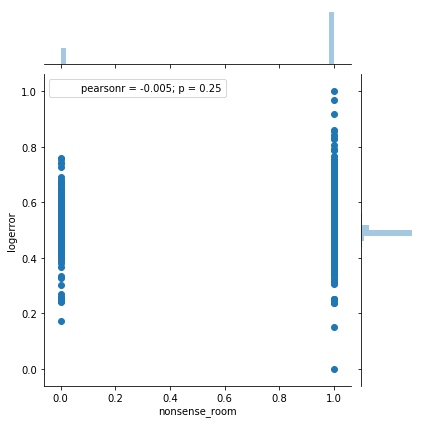

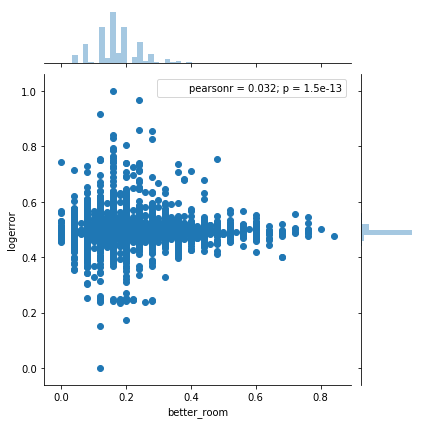

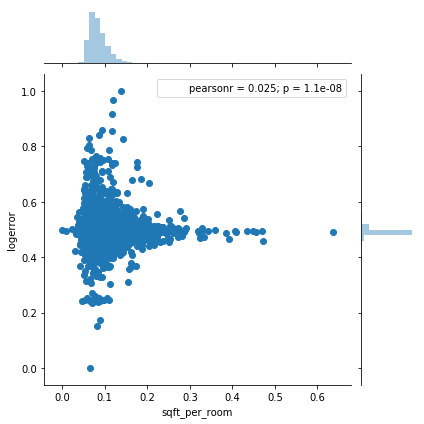

In [52]:
for column in X_train:
    sns.jointplot(X_train[column], y_train['logerror'], data=train).annotate(stats.pearsonr)

<Figure size 1440x1440 with 0 Axes>

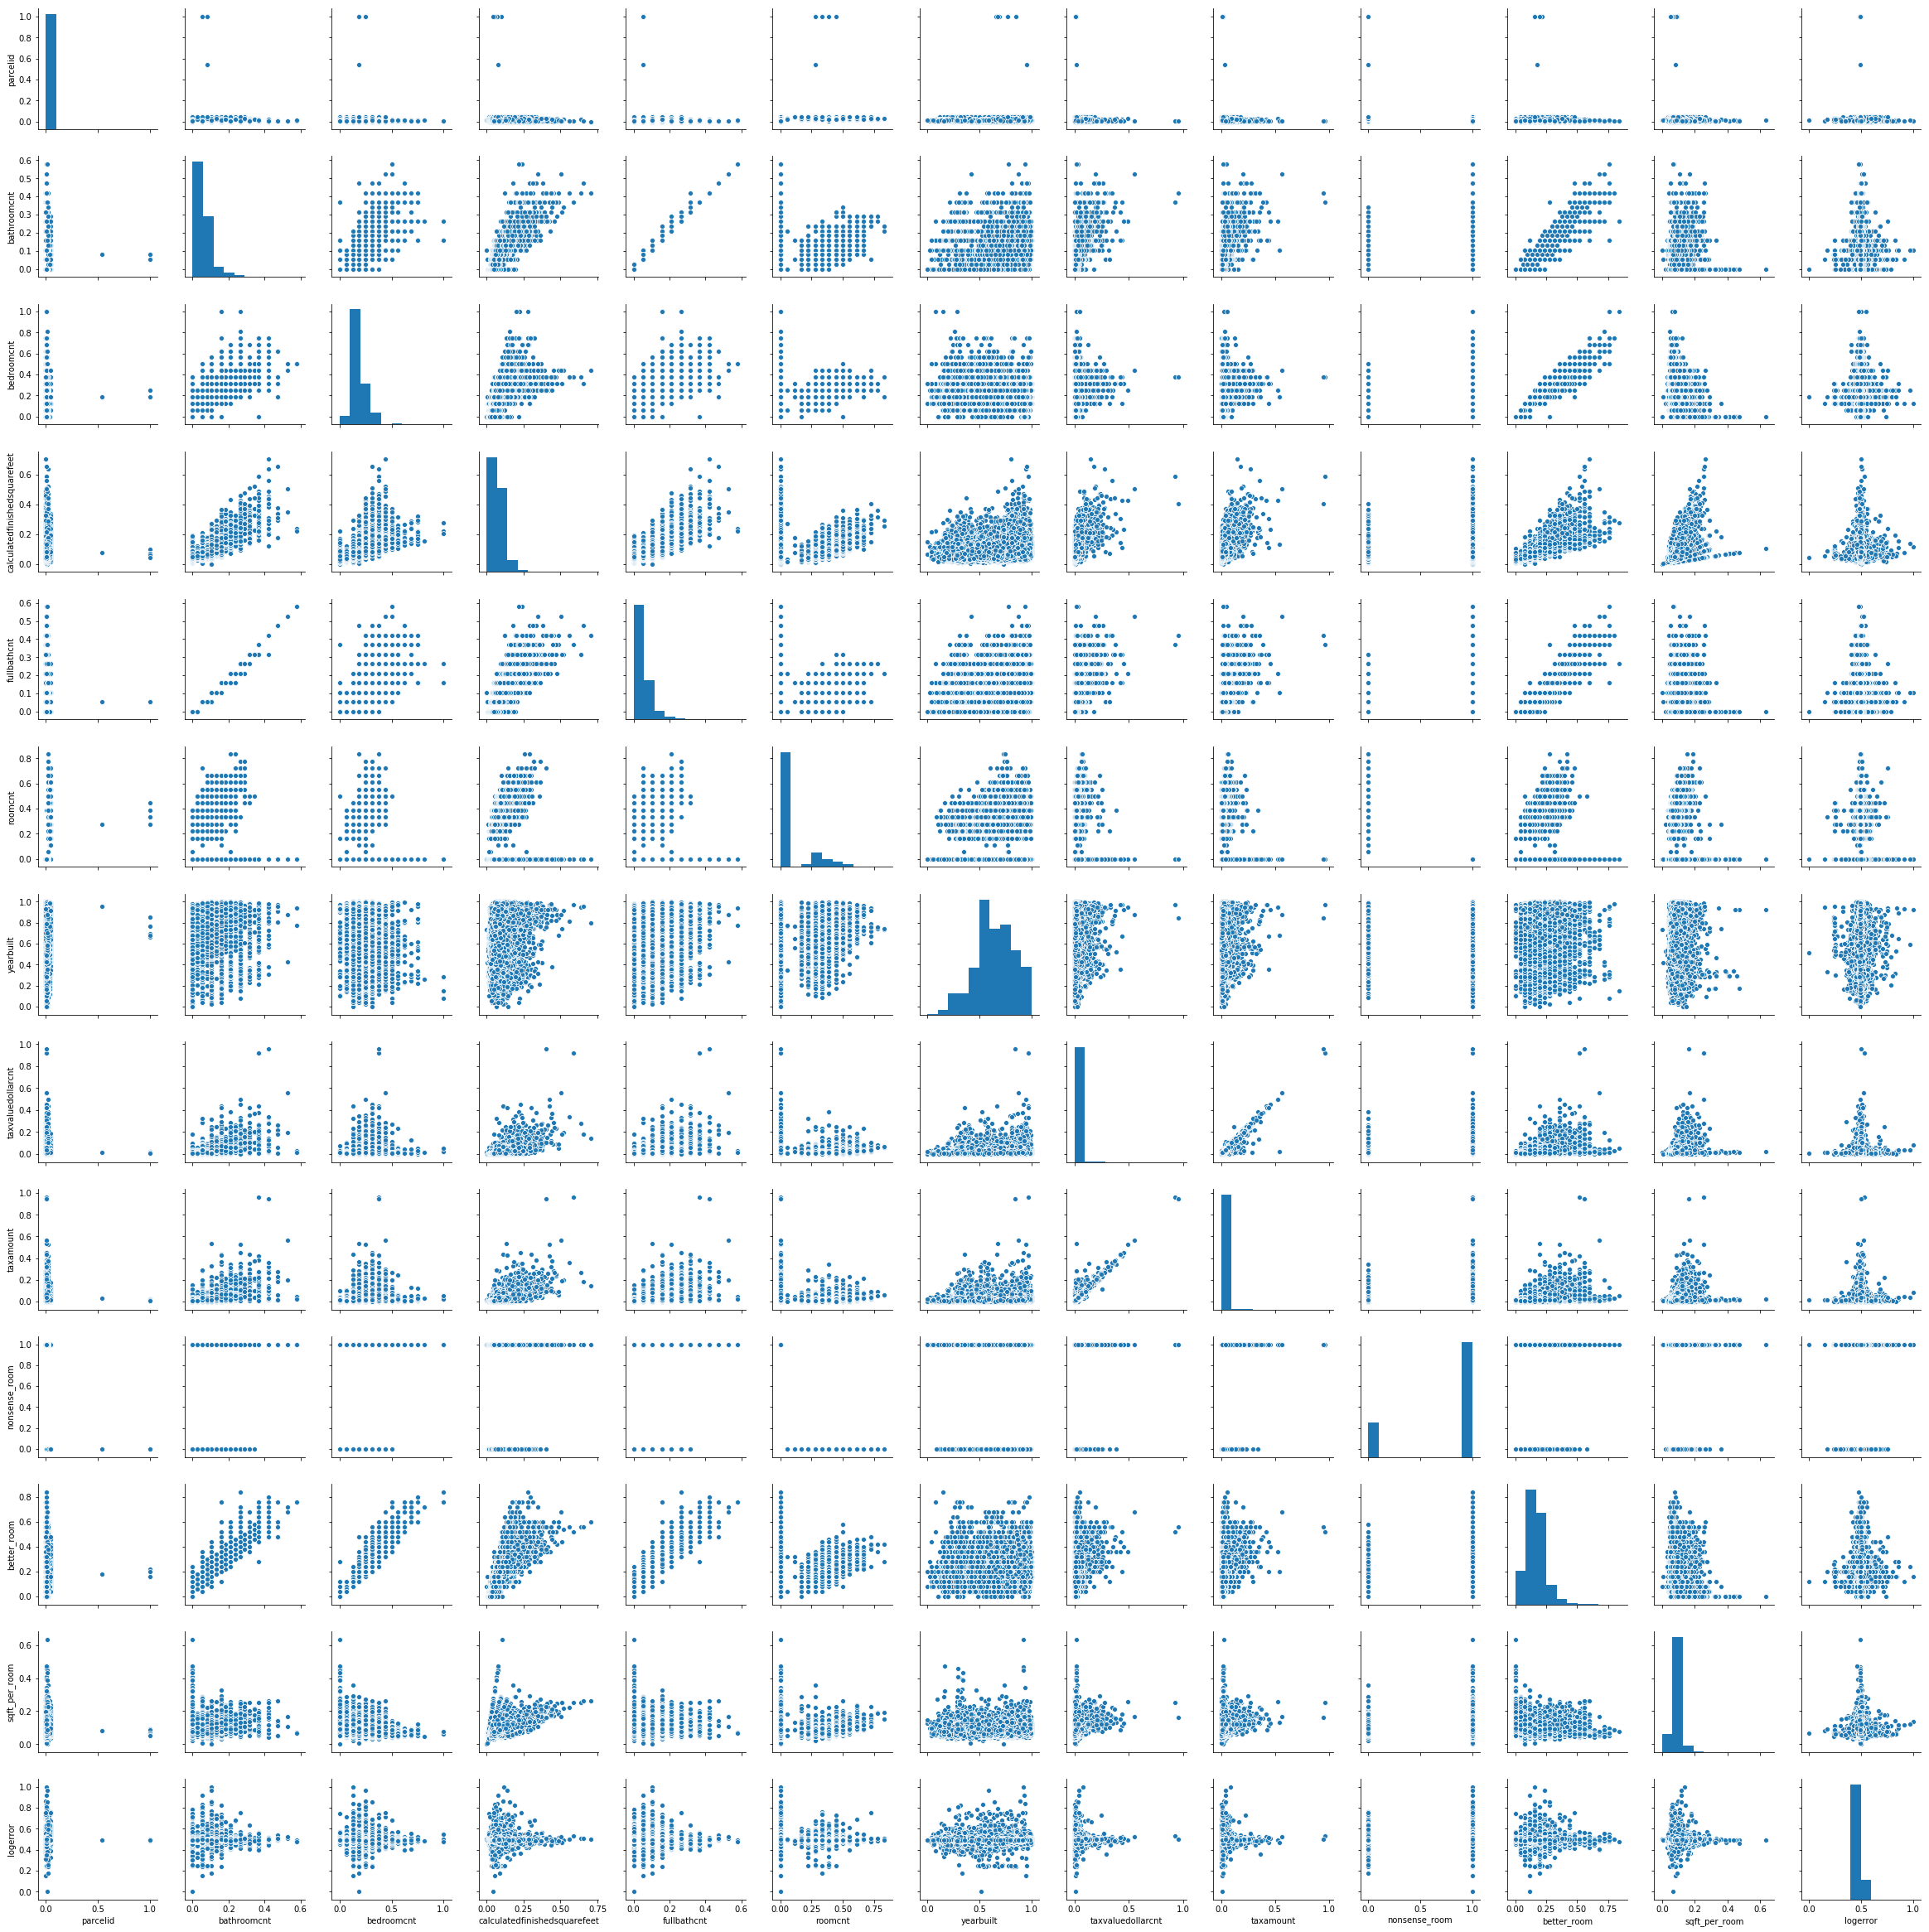

In [53]:
plt.figure(figsize=(20,20))
sns.pairplot(train)

After looking at the plots (heatmap, jointplots, pairplots), it doesn't seem like any of the independent variables have much of a correlation to `logerror`. This may be due to the data that was removed due to null values or potential outliers. After the initial regression model is made, further wrok can be done constructing models that ignore exclude outliers or include some of the attributes that were omitted. As for correlation between the independent variables, there is a strong correlation between `taxamount` and `taxvaluedollarcnt`. There is also a high correlation between `bathroomcnt` and `fullbathcnt`. `calculatedfinishedsquarefeet` has a correlation with the room count variables as well as the tax variables. After seeing these plots and the correlations, I think I will have to consider including other variables after creating this initial linear model.

Looking at different groups to determine if there is a difference in `logerror`.

Since data is min-max normalized, the values we want to group by need to be normalized i.e. for 3 bedrooms and 5 bedrooms, 3 and 5 need to be normalized.

In [54]:
joined_nonull.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,better_room,abs_logerror,sqft_per_room
count,8.887900e+04,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,8.887900e+04,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000
mean,1.297142e+07,2.308875,3.069488,1768.297686,2.240844,1.494943,1968.590713,4.576035e+05,5972.244672,0.011478,0.769552,5.378363,0.067343,325.017512
std,2.508203e+06,0.975543,1.109281,923.786902,0.962473,2.830641,23.766103,5.534683e+05,6804.606567,0.158224,0.421122,1.875884,0.143637,89.862891
min,1.071174e+07,1.000000,0.000000,2.000000,1.000000,0.000000,1885.000000,2.200000e+01,49.080000,-4.605000,0.000000,1.000000,0.000000,0.666667
25%,1.155474e+07,2.000000,2.000000,1182.000000,2.000000,0.000000,1953.000000,2.004310e+05,2882.055000,-0.025300,1.000000,4.000000,0.013900,264.166667
50%,1.254222e+07,2.000000,3.000000,1537.000000,2.000000,0.000000,1970.000000,3.436840e+05,4545.140000,0.006000,1.000000,5.000000,0.032500,307.636364
75%,1.421891e+07,3.000000,4.000000,2088.000000,3.000000,0.000000,1987.000000,5.405890e+05,6892.925000,0.038300,1.000000,6.000000,0.068600,366.909091
max,1.629608e+08,20.000000,16.000000,22741.000000,20.000000,18.000000,2015.000000,2.775000e+07,321936.090000,4.737000,1.000000,26.000000,4.737000,3790.166667


In [59]:
normalized_zillow.describe()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fullbathcnt,roomcnt,yearbuilt,taxvaluedollarcnt,taxamount,logerror,nonsense_room,better_room,abs_logerror,sqft_per_room
count,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000,88879.000000
mean,0.014842,0.068888,0.191843,0.077677,0.065308,0.083052,0.643005,0.016489,0.018401,0.494164,0.769552,0.175135,0.014216,0.085592
std,0.016474,0.051344,0.069330,0.040626,0.050656,0.157258,0.182816,0.019945,0.021140,0.016937,0.421122,0.075035,0.030322,0.023714
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005537,0.052632,0.125000,0.051893,0.052632,0.000000,0.523077,0.007222,0.008801,0.490227,1.000000,0.120000,0.002934,0.069534
50%,0.012023,0.052632,0.187500,0.067505,0.052632,0.000000,0.653846,0.012384,0.013968,0.493577,1.000000,0.160000,0.006861,0.081005
75%,0.023036,0.105263,0.250000,0.091737,0.105263,0.000000,0.784615,0.019480,0.021262,0.497035,1.000000,0.200000,0.014482,0.096647
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Is there a difference in `logerror` between properties with 3 bathrooms vs. 5 or more bathrooms?

In [61]:
def print_ttest_results(ttest, alpha=0.05):
    print(f'The p-value is : {ttest[1]}')
    if ttest[1] < alpha:
        print('There is a significant difference.')
    else:
        print('Not significant.')

bathmax = 20
bathmin = 1
threenorm = (3-1)/19
fivenorm = (5-1)/19


threebath = normalized_zillow.loc[normalized_zillow.bathroomcnt == threenorm]
# threebath.sample(10)

fivebath = normalized_zillow.loc[normalized_zillow.bathroomcnt >= fivenorm]
# fivebath.sample(10)

print_ttest_results(ttest_ind(threebath.logerror, fivebath.logerror))


The p-value is : 9.457507509369433e-08
There is a significant difference.


Is there a difference in `logerror` between properties with 1500 finished squarefeet and more than 5000 finished square feet?

In [62]:
squarefeetmin = 2
squarefeetmax = 22741

fifteenhunnorm = (1500-2)/22739
fivethousnorm = (5000-2)/22739

fifteenhunsf = normalized_zillow.loc[normalized_zillow.calculatedfinishedsquarefeet == fifteenhunnorm]

fivethoussf = normalized_zillow.loc[normalized_zillow.calculatedfinishedsquarefeet >= fivethousnorm]

print_ttest_results(ttest_ind(fifteenhunsf.logerror, fivethoussf.logerror))

The p-value is : 0.08349064249437606
Not significant.


Is there a difference in `logerror` between properties with 3 bedrooms and those with 5 or more bedrooms?

In [63]:
bedmin = 0
bedmax = 16

threebednorm = 3/16
fivebednorm = 5/16

threebed = normalized_zillow.loc[normalized_zillow.bedroomcnt == threebednorm]

fivebed = normalized_zillow.loc[normalized_zillow.bedroomcnt >= fivebednorm]

print_ttest_results(ttest_ind(threebed.logerror, fivebed.logerror))

The p-value is : 2.3830359949279157e-11
There is a significant difference.


# Data Modeling

Feature Engineering: What features can be created to benefit the model? Will consider adding age of property, room count as bath plus bed, etc.

In [ ]:
train.describe()

In [ ]:
joined_nonull.describe()

Assessing what variables are important to the model by performing an ordinary least squares regression of all variables.

In [76]:
ols_model_1 = sm.OLS(y_train, sm.add_constant(X_train))
fit = ols_model_1.fit()
fit.summary()

# ols_model_2 = sm.OLS(y_train2, X_train2)
# fit2 = ols_model_2.fit()
# fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     22.36
Date:                Mon, 25 Mar 2019   Prob (F-statistic):           2.53e-46
Time:                        00:45:52   Log-Likelihood:             1.4180e+05
No. Observations:               53327   AIC:                        -2.836e+05
Df Residuals:                   53315   BIC:                        -2.835e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.4943      0.001    539.406      0.000       0.493       0.496
parcelid                         0.0019      0.006      0.323      0.747      -0.009       0.013
bathroomcnt                     -0.0162      0.007     -2.387      0.017      -0.030      -0.003
bedroomcnt                       0.0022      0.003      0.789      0.430      -0.003       0.008
calculatedfinishedsquarefeet     0.0512      0.008      6.695      0.000       0.036       0.066
fullbathcnt                      0.0134      0.009      1.485      0.138      -0.004       0.031
roomcnt                         -0.0024      0.002     -1.244      0.214      -0.006       0.001
yearbuilt                        0.0010      0.000      2.215      0.027       0.000       0.002
taxvaluedollarcnt                0.0931      0.012      7.465      0.000       0.069       0.118
taxamount                       -0.1196      0.012    -10.265      0.000      -0.142      -0.097
nonsense_room                   -0.0007      0.001     -1.019      0.308      -0.002       0.001
better_room                     -0.0109      0.004     -2.831      0.005      -0.019      -0.003
sqft_per_room                   -0.0193      0.007     -2.707      0.007      -0.033      -0.005
==============================================================================
Omnibus:                    42121.178   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         40898941.221
Skew:                           2.509   Prob(JB):                         0.00
Kurtosis:                     138.578   Cond. No.                     1.24e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.45e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
# sm.OLS(y_train, X_train.drop(['bathroomcnt', 'calculatedfinishedsquarefeet'], axis=1)).fit().summary()

In [ ]:
# sm.OLS(y_train, X_train.drop(['bathroomcnt', 'calculatedfinishedsquarefeet', 'taxamount'], axis=1)).fit().summary()

After looking at the OLS model, all variables have a significant affect on `logerror` according to the p-values given.Due to this, the features with the highest t-value will be hosen for the initial model. In this case, those features are `bedroomcnt`, `yearbuilt`, and `in_california`. Once this is done I can add other features who have smaller t-values or remove some current features.

In [77]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.coef_)

lm_pred = lm.predict(X_train)

print(r2_score(y_train, lm_pred))

[[ 0.0018542  -0.01623178  0.00218003  0.05120482  0.01341123 -0.00238438
   0.00103875  0.09306787 -0.11960001 -0.00072915 -0.01094093 -0.01934925]]
0.004592413799026751


## Model 1

In [ ]:
lm1 = LinearRegression() 

In [ ]:
lm1.fit(X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxamount']], y_train)

lm1int = lm1.intercept_
print(lm1int)

lm1co = lm1.coef_
print(lm1co)

In [ ]:
lm1_train_pred = lm1.predict(X_train[['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxamount']])

In [ ]:
MSE = mean_squared_error(y_train, lm1_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm1_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm1_train_pred)
print(f'R^2 is: {R2}')

lowestMSE = MSE
lowestMAE = MAE
highestR2 = R2

Those are disappointing numbers. MSE and MAE are small, but that's probably due to `logerror` itself being small. $R^2$ shows that the predicted `logerror` from my model was way off from what the true `logerror` values were.

## Model 2

Model 1 was disappointing. Model 2 will use variables based off of domain knowledge. What variables make sense when thinking of what can cause differences in price and estimate? I will use `taxamount`, `bedroomcnt`, and `calculatedfinishedsquarefeet`.

In [ ]:
lm2 = LinearRegression()

In [ ]:
lm2.fit(X_train[['taxamount', 'yearbuilt', 'calculatedfinishedsquarefeet']], y_train)

lm2int = lm2.intercept_
print(lm2int)

lm2co = lm2.coef_
print(lm2co)

In [ ]:
lm2_train_pred = lm2.predict(X_train[['taxamount', 'yearbuilt', 'calculatedfinishedsquarefeet']])

In [ ]:
MSE = mean_squared_error(y_train, lm2_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm2_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm2_train_pred)
print(f'R^2 is: {R2}')

print('\n')

if MSE < lowestMSE:
    lowestMSE = MSE
    print('This MSE is the lowest MSE.')
else:
    print('This MSE is not the lowest MSE.')
    
if MAE < lowestMAE:
    lowestMSE = MAE
    print('This MAE is the lowest MAE.')
else:
    print('This MAE is not the lowest MAE.')
    
if R2 > highestR2:
    highestR2 = R2
    print('This R2 is the highest R2.')
else:
    print('This R2 is not the highest R2.')

At least $R^2$ improved and both MSE and MAE decreased. Since `bedroomcnt` had the lowest coefficient, and thus the smallest impact on `logerror`, it will be removed and replaced with something else.

## Model 3

Model 2 was slightly better than Model 1. Model 3 will replace `bedroomcnt` with `taxvaluedollarcnt` since it is directly related to the property value.

In [ ]:
lm3 = LinearRegression()

In [ ]:
lm3.fit(X_train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt', 'taxamount']], y_train)

lm3int = lm3.intercept_
print(lm2int)

lm3co = lm3.coef_
print(lm2co)

In [ ]:
lm3_train_pred = lm3.predict(X_train[['calculatedfinishedsquarefeet', 'bedroomcnt', 'yearbuilt', 'taxamount']])

In [ ]:
MSE = mean_squared_error(y_train, lm3_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm3_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm3_train_pred)
print(f'R^2 is: {R2}')

print('\n')

if MSE < lowestMSE:
    lowestMSE = MSE
    print('This MSE is the lowest MSE.')
else:
    print('This MSE is not the lowest MSE.')
    
if MAE < lowestMAE:
    lowestMSE = MAE
    print('This MAE is the lowest MAE.')
else:
    print('This MAE is not the lowest MAE.')
    
if R2 > highestR2:
    highestR2 = R2
    print('This R2 is the highest R2.')
else:
    print('This R2 is not the highest R2.')

## Model 4

Removed engineered feature due to misunderstanding of data. This should be seen as linear model 1, but for sake of preserving work, it will be linear model 4. That said, this model will have all variables in it except for `regionidzip`.

In [ ]:
lm4 = LinearRegression()

In [ ]:
lm4.fit(X_train, y_train)

lm4int = lm4.intercept_
print(lm4int)

lm4co = lm4.coef_
print(lm4co)

In [ ]:
lm4_train_pred = lm4.predict(X_train)

In [ ]:
MSE = mean_squared_error(y_train, lm4_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm4_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm4_train_pred)
print(f'R^2 is: {R2}')

print('\n')

if MSE < lowestMSE:
    lowestMSE = MSE
    print('This MSE is the lowest MSE.')
else:
    print('This MSE is not the lowest MSE.')
    
if MAE < lowestMAE:
    lowestMSE = MAE
    print('This MAE is the lowest MAE.')
else:
    print('This MAE is not the lowest MAE.')
    
if R2 > highestR2:
    highestR2 = R2
    print('This R^2 is the highest R2.')
else:
    print('This R^2 is not the highest R2.')

# Model based on outliers

In [ ]:
lm0 = LinearRegression()
lm0.fit(X_train[['calculatedfinishedsquarefeet', 'taxamount']], y_train)

lm0int = lm0.intercept_
print(lm0int)

lm0co = lm0.coef_
print(lm0co)

In [ ]:
lm0_train_pred = lm1.predict(X_train[['calculatedfinishedsquarefeet', 'taxamount']])

In [ ]:
MSE = mean_squared_error(y_train, lm0_train_pred)
print(f'Mean squared error is: {MSE}')

MAE = median_absolute_error(y_train, lm0_train_pred)
print(f'Median absolute error is: {MAE}')

R2 = r2_score(y_train, lm0_train_pred)
print(f'R^2 is: {R2}')

print('\n')

if MSE < lowestMSE:
    lowestMSE = MSE
    print('This MSE is the lowest MSE.')
else:
    print('This MSE is not the lowest MSE.')
    
if MAE < lowestMAE:
    lowestMSE = MAE
    print('This MAE is the lowest MAE.')
else:
    print('This MAE is not the lowest MAE.')
    
if R2 > highestR2:
    highestR2 = R2
    print('This R^2 is the highest R2.')
else:
    print('This R^2 is not the highest R2.')